In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline
from nltk import word_tokenize,sent_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
stop = stopwords.words('english')
import nltk
import pandas as pd
import numpy as np
import re
from nltk import ngrams,bigrams,trigrams 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import train_test_split
import string

In [2]:
df = pd.read_excel(r"C:\Users\Rahul\Downloads\spam.xlsx")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# Drop NAN columns

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df['v2'].describe() 

count                       5572
unique                      5163
top       Sorry, I'll call later
freq                          30
Name: v2, dtype: object

In [8]:
df.describe() 

,v1,v2
count,5572,5572
unique,2,5163
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.head() 

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['v2']=df['v2'].astype(str) # Messages are converted to string

In [12]:
df['length']=df['v2'].apply(len)
df.head() 

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


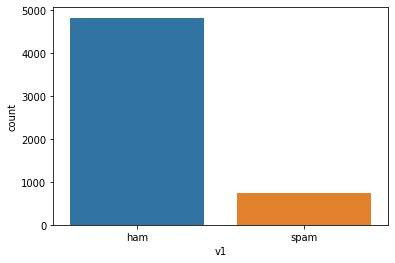

In [13]:
sns.countplot(x='v1',data=df) 

In [14]:
# from above graph ham messages are more than spam,so data biased

In [15]:
df.shape

(5572, 3)

In [16]:
stop_words=stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
lem=WordNetLemmatizer()

In [18]:
def preprocessing(message):
    nospc=[i for i in message if i not in string.punctuation]
    text=''.join(nospc)
    pre_text=[]
    for word in text.split():
        if word.lower() not in stop_words:
            lower_text=word.lower()
            pre_text.append(lower_text)
    lem_data=[]
    for i in pre_text:
        lem_words=[]
        for words in i:
            lemm=lem.lemmatize(words)
            lem_words.append(lemm)
        lem_data.append(''.join(lem_words))
    return lem_data 

In [19]:
mess_pre=(df['v2']).apply(preprocessing)  

In [20]:
df['mess_pre']=mess_pre
df.head() 

,v1,v2,length,mess_pre
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, dont, think, goes, usf, lives, around, t..."


In [21]:
df['mess_pre'] 

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, �750, pou...
5568                   [�, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: mess_pre, Length: 5572, dtype: object

##### Most Frequent sentences

In [22]:
def mostfrequentword(df_name,intial_column,followed_column,search_term):
    try:
        frequent_list=df_name[followed_column][df_name[intial_column]==search_term].value_counts()/len(df_name[followed_column][df_name[intial_column]==search_term])
        frequent_word=frequent_list.index[0]
        return frequent_word,frequent_list
    except:
        print('no such word {} in the data'.format(search_term))

In [23]:
mostfrequentword(df,'v1','mess_pre','ham') 

(['sorry', 'ill', 'call', 'later'],
 [sorry, ill, call, later]                                                                                                              0.006218
 [ok]                                                                                                                                   0.004145
 [cant, pick, phone, right, pls, send, message]                                                                                         0.002487
 [okie]                                                                                                                                 0.001451
 [ok, lor]                                                                                                                              0.001036
                                                                                                                                          ...   
 [usually, person, unconscious, thats, children, adults, may, behave, abnormally, ill, call]  

In [24]:
mostfrequentword(df,'v1','mess_pre','ham')[0] # most frequent sentences in ham

['sorry', 'ill', 'call', 'later']

In [25]:
mostfrequentword(df,'v1','mess_pre','spam')[0] 

['please',
 'call',
 'customer',
 'service',
 'representative',
 'freephone',
 '0808',
 '145',
 '4742',
 '9am11pm',
 'guaranteed',
 '�1000',
 'cash',
 '�5000',
 'prize']

In [26]:
# changing spam and ham to numerical values

In [27]:
df['v1_num']=df['v1'].map({'spam':1,'ham':0}).astype(int)
df 

,v1,v2,length,mess_pre,v1_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazy, available, bugis, n...",0
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",1
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor, u, c, already, say]",0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, dont, think, goes, usf, lives, around, t...",0
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,"[2nd, time, tried, 2, contact, u, u, �750, pou...",1
5568,ham,Will �_ b going to esplanade fr home?,37,"[�, b, going, esplanade, fr, home]",0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"[pity, mood, soany, suggestions]",0
5570,ham,The guy did some bitching but I acted like i'd...,125,"[guy, bitching, acted, like, id, interested, b...",0


In [ ]:
df

#### Commonly used good n bad(ham) sentences 

In [29]:
df_ham=df[df['v1']=='ham']['mess_pre']
df_spam=df[df['v1']=='spam']['mess_pre']
df_spam                                 # these are spam messages

2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
5       [freemsg, hey, darling, 3, weeks, word, back, ...
8       [winner, valued, network, customer, selected, ...
9       [mobile, 11, months, u, r, entitled, update, l...
11      [six, chances, win, cash, 100, 20000, pounds, ...
                              ...                        
5537    [want, explicit, sex, 30, secs, ring, 02073162...
5540    [asked, 3mobile, 0870, chatlines, inclu, free,...
5547    [contract, mobile, 11, mnths, latest, motorola...
5566    [reminder, o2, get, 250, pounds, free, call, c...
5567    [2nd, time, tried, 2, contact, u, u, �750, pou...
Name: mess_pre, Length: 747, dtype: object

In [30]:
df_ham                   # these are ham messages

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
6       [even, brother, like, speak, treat, like, aids...
                              ...                        
5565                                           [huh, lei]
5568                   [�, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: mess_pre, Length: 4825, dtype: object

In [31]:
# count of good and bad words

In [32]:
def mostfreword(df):
    word_dict={}
    for i in df:
        for j in i:
            if j not in word_dict.keys():
                word_dict.update({j:1})
            else:
                word_dict.update({j:word_dict[j]+1})
    k=max(word_dict,key=word_dict.get)
    print('the most frequent word is {} which ocuured {} times'.format(k,word_dict[k]))
    return word_dict 

In [33]:
mostfreword(df_spam) 

the most frequent word is call which ocuured 347 times


{'free': 216,
 'entry': 26,
 '2': 173,
 'wkly': 14,
 'comp': 10,
 'win': 60,
 'fa': 4,
 'cup': 5,
 'final': 16,
 'tkts': 4,
 '21st': 2,
 'may': 7,
 '2005': 3,
 'text': 120,
 '87121': 4,
 'receive': 33,
 'questionstd': 2,
 'txt': 150,
 'ratetcs': 2,
 'apply': 29,
 '08452810075over18s': 2,
 'freemsg': 12,
 'hey': 5,
 'darling': 2,
 '3': 22,
 'weeks': 13,
 'word': 22,
 'back': 23,
 'id': 3,
 'like': 13,
 'fun': 9,
 'still': 7,
 'tb': 1,
 'ok': 5,
 'xxx': 11,
 'std': 9,
 'chgs': 1,
 'send': 67,
 '�150': 27,
 'rcv': 2,
 'winner': 16,
 'valued': 11,
 'network': 25,
 'customer': 49,
 'selected': 25,
 'receivea': 2,
 '�900': 7,
 'prize': 92,
 'reward': 10,
 'claim': 113,
 'call': 347,
 '09061701461': 2,
 'code': 29,
 'kl341': 2,
 'valid': 23,
 '12': 10,
 'hours': 5,
 'mobile': 123,
 '11': 5,
 'months': 4,
 'u': 147,
 'r': 22,
 'entitled': 8,
 'update': 19,
 'latest': 36,
 'colour': 17,
 'mobiles': 12,
 'camera': 33,
 'co': 5,
 '08002986030': 2,
 'six': 3,
 'chances': 2,
 'cash': 62,
 '100': 15

In [34]:
mostfreword(df_ham) # "U" is most frequent word 

the most frequent word is u which ocuured 972 times


{'go': 247,
 'jurong': 1,
 'point': 13,
 'crazy': 10,
 'available': 13,
 'bugis': 7,
 'n': 134,
 'great': 100,
 'world': 32,
 'la': 7,
 'e': 78,
 'buffet': 2,
 'cine': 7,
 'got': 231,
 'amore': 1,
 'wat': 95,
 'ok': 272,
 'lar': 38,
 'joking': 6,
 'wif': 27,
 'u': 972,
 'oni': 4,
 'dun': 55,
 'say': 91,
 'early': 33,
 'hor': 2,
 'c': 60,
 'already': 89,
 'nah': 10,
 'dont': 257,
 'think': 128,
 'goes': 26,
 'usf': 11,
 'lives': 4,
 'around': 59,
 'though': 26,
 'even': 55,
 'brother': 18,
 'like': 229,
 'speak': 23,
 'treat': 16,
 'aids': 1,
 'patent': 1,
 'per': 12,
 'request': 7,
 'melle': 6,
 'oru': 4,
 'minnaminunginte': 3,
 'nurungu': 3,
 'vettam': 3,
 'set': 19,
 'callertune': 10,
 'callers': 5,
 'press': 7,
 '9': 26,
 'copy': 9,
 'friends': 53,
 'im': 449,
 'gonna': 58,
 'home': 160,
 'soon': 56,
 'want': 163,
 'talk': 40,
 'stuff': 42,
 'anymore': 8,
 'tonight': 57,
 'k': 71,
 'ive': 73,
 'cried': 1,
 'enough': 27,
 'today': 125,
 'searching': 5,
 'right': 89,
 'words': 22,
 't

### convert sentences into vectors( CountVectorizer) 

In [35]:
cv= CountVectorizer(analyzer=preprocessing)

In [36]:
bow=cv.fit_transform(df['mess_pre']).toarray()  # bow--bag of words
bow 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
df['v1_num'].value_counts() 

0    4825
1     747
Name: v1_num, dtype: int64

-  from above we observe data is biased

- Data is imbalanced. so,  by using SMOTE technique we make the data balanced

In [38]:
import imblearn

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
x_resample,y_resample=SMOTE().fit_resample(bow,df['v1_num']) 

In [41]:
pd.Series(y_resample).value_counts() 

1    4825
0    4825
Name: v1_num, dtype: int64

-  after applying SMOTE technique data is balanced 

In [42]:
bow.shape

(5572, 5111)

- splitting data into training(95%) and testing(5%)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.05) 

In [44]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9167, 5111), (483, 5111), (9167,), (483,))

### Building MultiNomialNB model

In [45]:
model_final=MultinomialNB()

In [46]:
model_final.fit(x_train,y_train) # fitting the model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

- Metrics and predictions

In [47]:
y_pred=model_final.predict(x_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,recall_score,precision_score

In [49]:
accuracy=accuracy_score(y_test,y_pred)

In [50]:
accuracy

0.14492753623188406

In [51]:
recall=recall_score(y_test,y_pred)
recall

0.1875

In [52]:
precision=precision_score(y_test,y_pred) # very low test size is low
precision

0.20987654320987653

In [53]:
print('predicted:',model_final.predict(bow)[2])
print('expected:',df.v1_num[2])  

predicted: 1
expected: 1


In [54]:
print('predicted:',model_final.predict(bow)[100])
print('expected:',df.v1_num[100]) 

predicted: 0
expected: 0


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.08      0.09      0.08       211
           1       0.21      0.19      0.20       272

    accuracy                           0.14       483
   macro avg       0.14      0.14      0.14       483
weighted avg       0.15      0.14      0.15       483



In [56]:
print(confusion_matrix(y_test,y_pred))

[[ 19 192]
 [221  51]]


In [57]:
model_final.score(x_train,y_train)

0.6120868332060653

In [58]:
model_final.score(x_test,y_test)

0.14492753623188406

In [59]:
# calculate metrics for total data

In [60]:
model_pred=model_final.predict(bow)

In [61]:
model_pred

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
accuracy_score(df['v1_num'],model_pred)  

0.9655419956927495

In [63]:
recall_score(df['v1_num'],model_pred)  #100% probabability the model is going to predict that the message is spam

1.0

In [64]:
precision_score(df['v1_num'],model_pred) 

0.7955271565495208

In [65]:
print(classification_report(df['v1_num'],model_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4825
           1       0.80      1.00      0.89       747

    accuracy                           0.97      5572
   macro avg       0.90      0.98      0.93      5572
weighted avg       0.97      0.97      0.97      5572



In [67]:
print(confusion_matrix(df['v1_num'],model_pred))

[[4633  192]
 [   0  747]]


### Prediction on New sentence 

In [68]:
sample_text=['HI Welcome to DataScience classes']

In [69]:
def predict_spam(sample_text):
    sample_text_pre=preprocessing(sample_text)
    bow_sample=cv.transform([sample_text_pre]).toarray()
    spam=model_final.predict(bow_sample)
    return spam

In [70]:
predict_spam(sample_text)

array([0])